In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import rasterio
import os

import albumentations as A

In [2]:
train_df = pd.read_csv('splits/Train.csv')
test_df = pd.read_csv('splits/Test.csv')

In [3]:
train_df.head()

image_id                        bbox  category_id      id
0  id_w55q2qr62fsk    [122.0, 1.0, 42.0, 30.0]          2.0  6356.0
1  id_fvldv7o1kn9d  [500.0, 141.0, 74.0, 70.0]          2.0  2305.0
2  id_5d1r9l1jp7b5  [304.0, 525.0, 54.0, 58.0]          2.0   238.0
3  id_45qru79t6s4n  [187.0, 298.0, 44.0, 56.0]          2.0   921.0
4  id_84cjf2pbqmtv  [349.0, 721.0, 58.0, 59.0]          2.0  1362.0

In [5]:
test_df.head()

image_id
0  id_uawi0k5spci5
1  id_ba566jv4xzln
2  id_q4odggcgnc77
3  id_4lrqmvmmgier
4  id_sqadni8gqzao

In [4]:
submission = pd.read_csv('SampleSubmission.csv')
submission.head()

image_id  Target
0  id_uawi0k5spci5_1       0
1  id_uawi0k5spci5_2       0
2  id_uawi0k5spci5_3       0
3  id_ba566jv4xzln_1       0
4  id_ba566jv4xzln_2       0

In [6]:
train_df.shape

(26156, 4)

In [8]:
np.unique(train_df.image_id).shape

(4772,)

/trinity/home/georgy.popandopulo/.conda/envs/rwanda/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


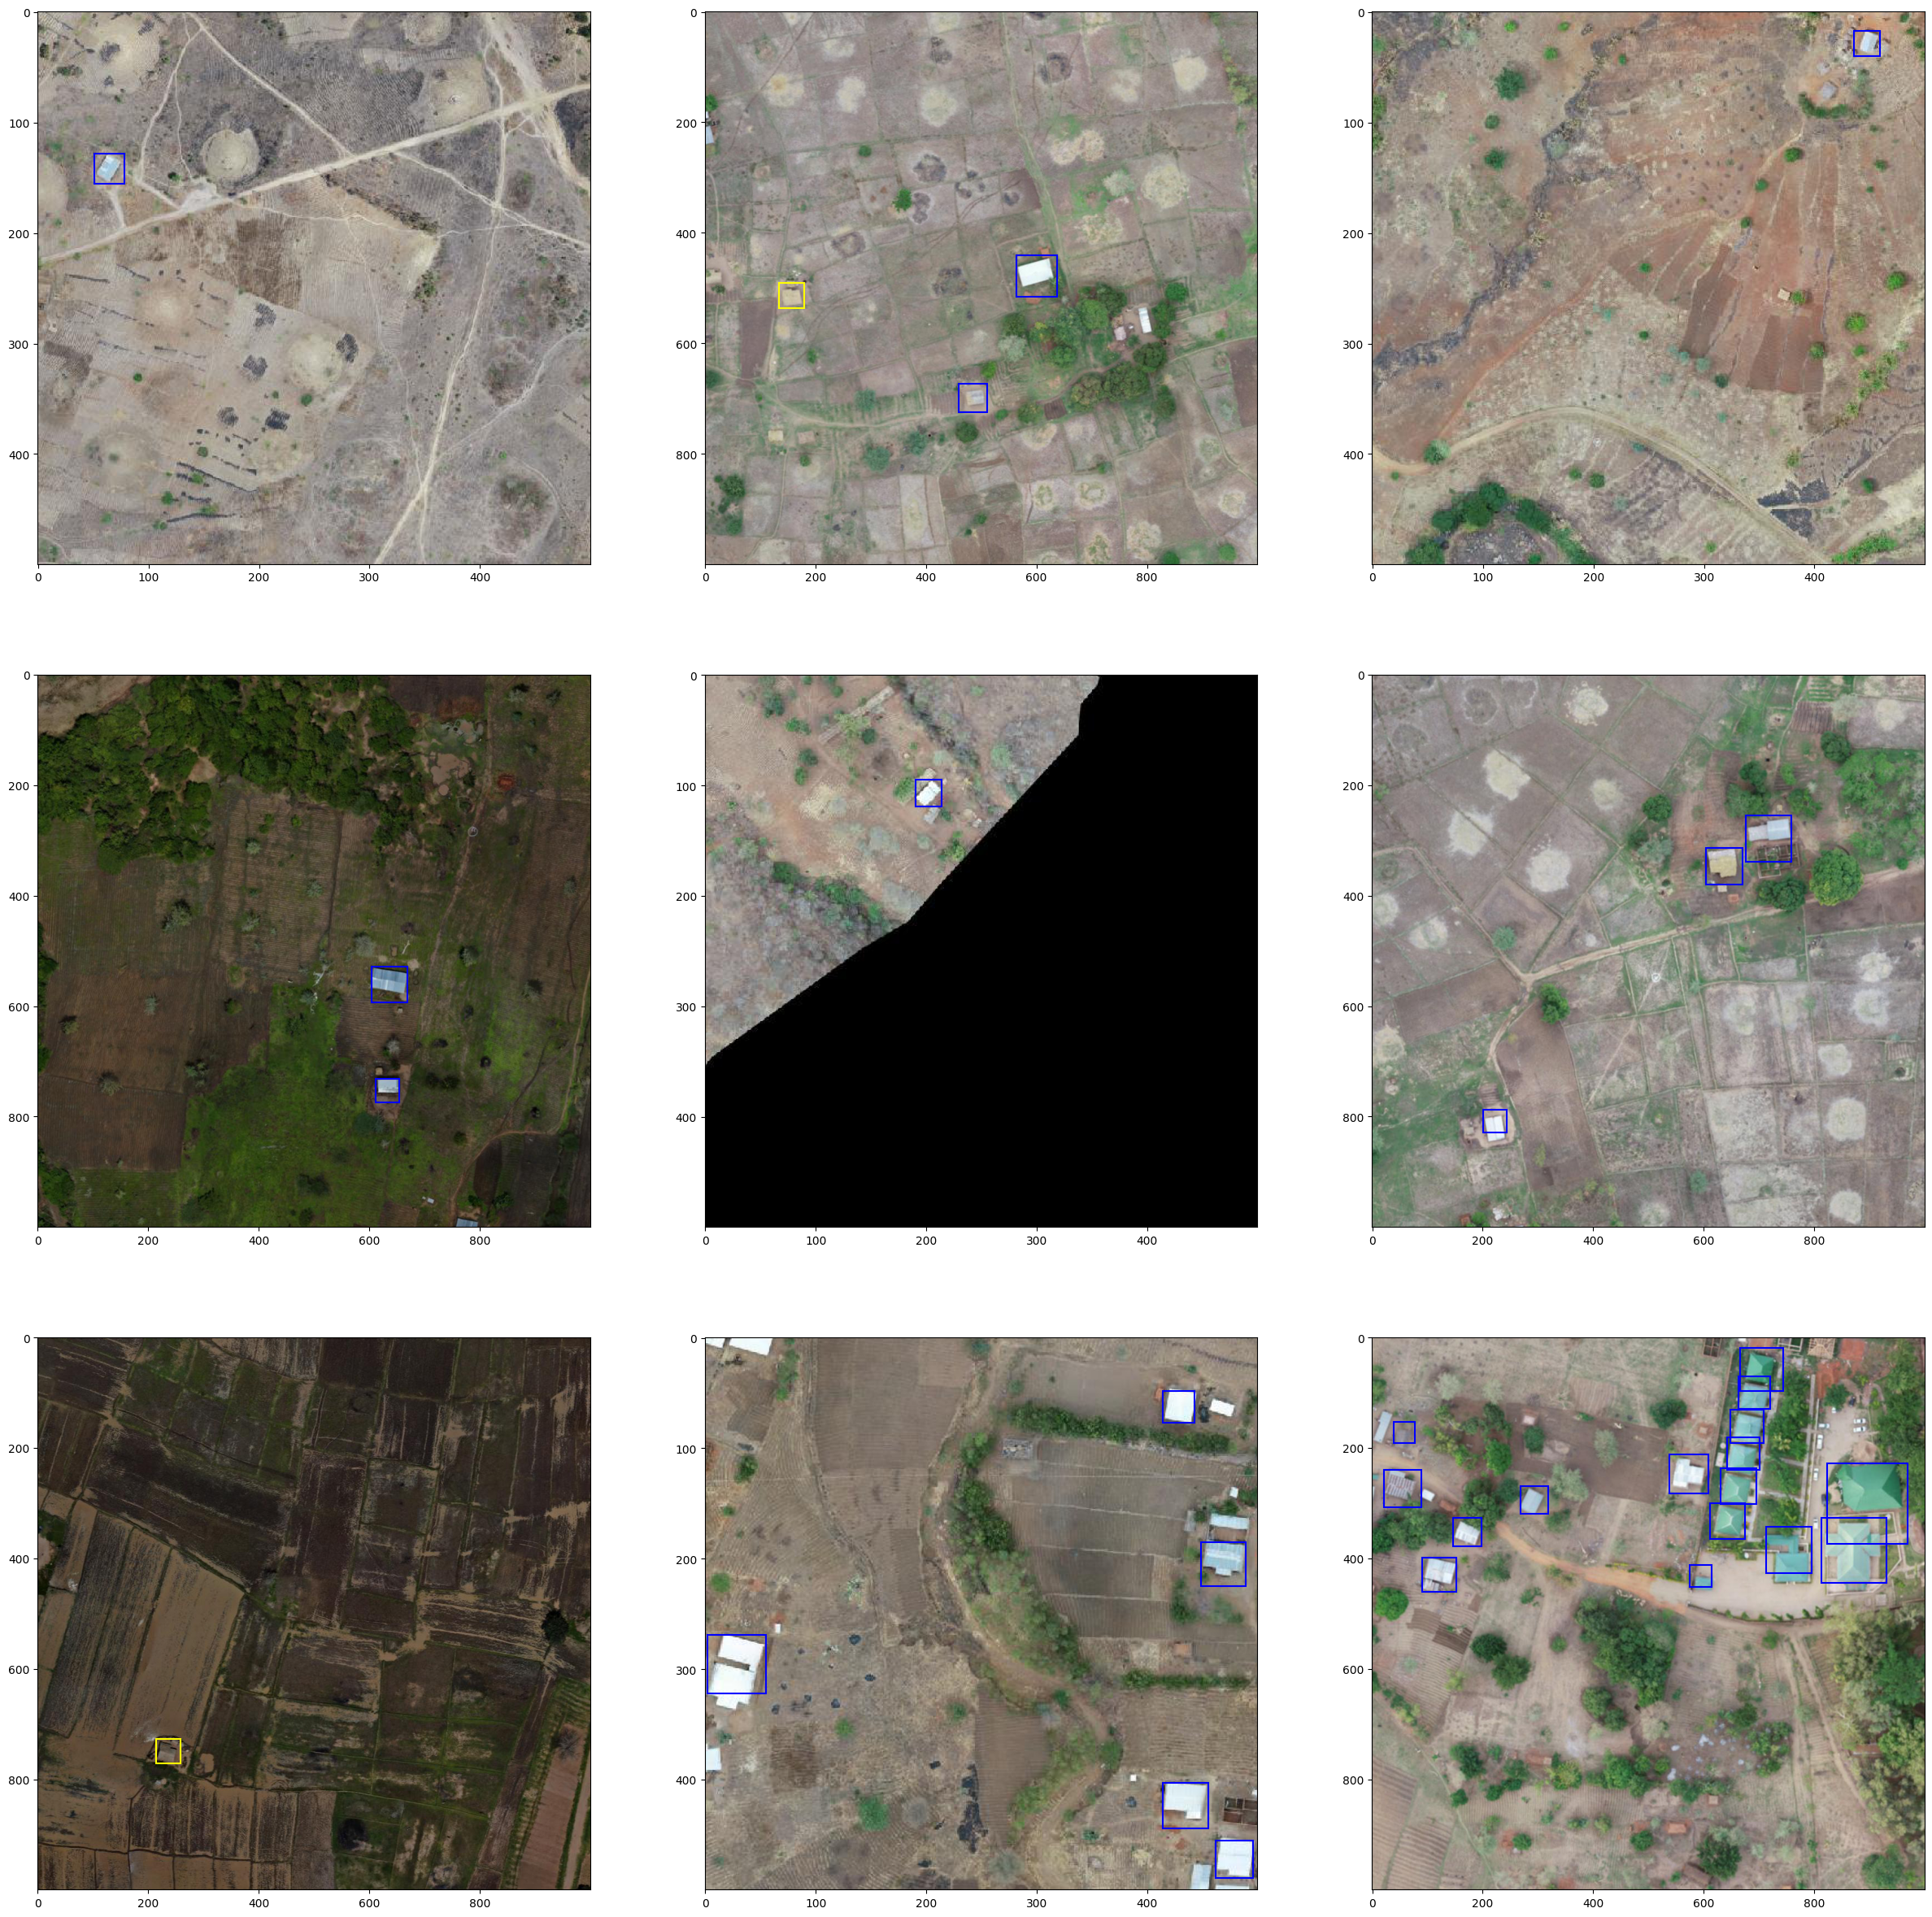

In [41]:
fig, axes = plt.subplots(3, 3, figsize=(30, 30))
colors = {1 : "red", 2 : "blue", 3 : "yellow"}

df = train_df[~train_df.bbox.isna()]
grouped_df = df.groupby('image_id')

images_root = 'Images'

for i, (key, item) in enumerate(grouped_df):
    group = grouped_df.get_group(key)

    file_name = f"{group.iloc[0].image_id}.tif"
    image = rasterio.open(os.path.join(images_root, file_name)).read().transpose((1,2,0))

    axes[i//3, i%3].imshow(image)
    for j in range(group.shape[0]):
        bbox = eval(group.iloc[j].bbox)
        category = group.iloc[j].category_id

        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[2], linewidth=1.5, edgecolor=colors[category], facecolor='none')
        axes[i//3, i%3].add_patch(rect)

    if i == 8:
        break